In [413]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import CoherenceModel
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import LdaModel
from operator import itemgetter

In [414]:
pd.set_option('display.max_colwidth' , 200)
reviews_df = pd.read_csv('K8 Reviews v0.2.csv')

reviews_df.sample(10)

,sentiment,review
12013,1,Nice and amazing mobile... faster processer and high gb storage.. great pictures clarity
7394,1,Nice phone in this range
7105,1,Excellent Quality of Product
13005,1,Its really an amazing product from Lenovo.
5874,0,Waste of money
8518,0,Finger senser is not working in twodays of purchase
6705,1,"VERY GOOD PRODUCT BATTERY BACKUP IS VERY GOOD NICE LOOKING SMOOTH TOUCH ONLY CAMERA QUALITY AND SOUND QUALITY NOT UP TO THE MARK ,SPECIALLY THE SOUND QUALITY IS VERY POOR ,K5 NOTE SOUND QUALITY IS..."
12534,1,Working perfectly. Not found any of the problems.Thanks team
6263,1,Nice phone
14009,0,No battery backup


In [415]:
reviews_df.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [416]:
reviews_df['review_length'] = [len(review) for review in reviews_df.review]
reviews_df.sample(10)

,sentiment,review,review_length
12024,0,Even not a whole year is passed but it has a lot off heating issue after oreo update and the data is not getting on and the bill that was provided by amazon has no information left in it means the...,229
9657,0,"Good phone but its user interface is not so much good even it doesn't have stock music,video player as well as gallery also..it has duel camera but i don't feel like any difference between dual ca...",277
14343,0,I have purchased this phone 3 months back and was very excited when the phone arrived. Honestly speaking every thing in this phone is good except the battery life. The battery really sucks. It doe...,764
6478,1,Good and on time delivery,25
5520,1,Nice,4
5275,0,it is taking too long time in full charge i.e. 4 to 5 hoursits a bad performanceSuresh kumawatBikaner Rajasthan,111
5474,0,"This phone is not good...camera, Battery is not good...",55
5277,1,Very nice phone,15
8568,0,"Try to keep faith on customers. This product really very bad . This phone is having so much bugs try to improve your product. Don't play with us. Camera ,video quality, battery, display, even hard...",228
4223,0,OMG...AFTER USING 12 HRS I GOT MAJOR PROBLEM...SIGNAL IS VERY VERY WEAK WHEN COMPARED TO OTHER MOBILES.please avoid,115


In [417]:
reviews_df.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [418]:
reviews_df['review_length'] = [len(review) for review in reviews_df.review]
reviews_df.sample(10)

,sentiment,review,review_length
7851,0,I've wasted my money by buying this smartphone. It's video recording quality is worst. I've purchased this phone specially for it's camera but they made me fool. Really sad.,173
6172,0,Back and front camera is not as expected,40
7473,1,"Lenovo k8 note is nice, but camera and battery is not up to mark, even FM radio has very low sound. I could have been more better!!!!!!!",136
6333,0,Network signal issue with this device.please arrange refund.Its worthless mobile,80
2612,0,It is good as it says. surprisingly battery doesnt seems to stay longer as a 4000mah.,85
8882,1,Better than expected,20
14315,1,Good and best phone,19
2930,0,"Battery drains too fast even when the data is off.Many inbuilt apps are not working, unable yo play files on my memory card.Everyday a new problem.",147
13495,1,One of the Best phone for me i like it.,39
10641,1,Excellent Product. Meets all my expectations.,45


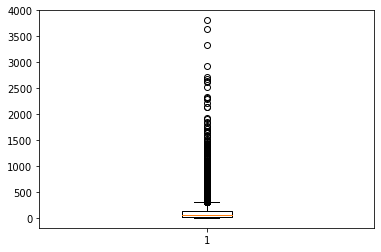

In [419]:
plt.boxplot(reviews_df.review_length)
plt.show()

In [420]:
reviews_df.review = reviews_df.review.apply(str.lower)
reviews_df.review = reviews_df.review.str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
reviews_df.review = reviews_df.review.str.replace(r'\s{2,}', ' ',regex=True)

In [421]:
reviews_df[reviews_df.review_length <= 10].sample(10)

,sentiment,review,review_length
8838,1,nice one,8
14429,0,poor,4
3656,1,excellent,9
1723,0,ok,2
12027,1,excellent,9
3412,1,super,5
6710,1,nice one,8
13285,1,good,4
5797,1,thanks,6
8970,1,good,4


In [422]:
reviews_df[reviews_df.review_length >10].sample(10)

,sentiment,review,review_length
3529,1,used for months cool phone now got oreo update,51
13643,0,this phone is not proper working charging problem heating problem not like this core processor nd not a better for snapedragon,151
11579,0,very cheap product pls don t buy this product,45
3187,0,hifi sound system not avilable iam not satisfied this prodect,61
9379,0,it takes clicks to unlock the phone calls don t get picked up calls don t get disconnected horrible experience don t but this phone amazon isn t helpful as they used to be,182
12346,0,great phone only problem is heating in heavy gaming supb ph the dual camera is not gud but single is awesome it produces the original colour of objects not fack,169
10296,1,only problem about camara all other is ok,41
1535,1,good one in this range,27
2489,0,very bad music quality while listening to earpiece dobly atmos isn t working at all i was getting good and loud sound quality in my old samsung device i switched from samsung to lenovo but i am re...,359
1134,0,camera is not good,18


In [423]:
reviews= reviews_df.review.to_list()
reviews

['good but need updates and improvements',
 'worst mobile i have bought ever battery is draining like hell backup is only to hours with internet uses even if i put mobile idle its getting discharged this is biggest lie from amazon lenove which is not at all expected they are making full by saying that battery is mah booster charger is fake it takes at least to hours to be fully charged don t know how lenovo will survive by making full of us please don t go for this else you will regret like me ',
 'when i will get my cash back its already january ',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone highly disappointing of amazon',
 'only i m telling don t buyi m totally disappointedpoor batterypoor camerawaste of money',
 'phone is awesome but while charging it heats up allot really a genuine reason to hate lenovo k note',
 'the battery level has worn down',
 'it s over hitting problems and phone hang

In [424]:
len(reviews)

14675

In [425]:
reviews[:3]

['good but need updates and improvements',
 'worst mobile i have bought ever battery is draining like hell backup is only to hours with internet uses even if i put mobile idle its getting discharged this is biggest lie from amazon lenove which is not at all expected they are making full by saying that battery is mah booster charger is fake it takes at least to hours to be fully charged don t know how lenovo will survive by making full of us please don t go for this else you will regret like me ',
 'when i will get my cash back its already january ']

- drop rows with less then 4 reviews 

In [426]:
review_tokens = [word_tokenize(text) for text in reviews]
review_tokens[:2]

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  'backup',
  'is',
  'only',
  'to',
  'hours',
  'with',
  'internet',
  'uses',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged',
  'this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  'mah',
  'booster',
  'charger',
  'is',
  'fake',
  'it',
  'takes',
  'at',
  'least',
  'to',
  'hours',
  'to',
  'be',
  'fully',
  'charged',
  'don',
  't',
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us',
  'please',
  'don',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will',
  'regret',
  'like',
  'me']]

In [427]:
len(review_tokens)

14675

In [428]:
words_with_one_letter = [i for i in review_tokens if len(i) == 1]
words_with_one_letter[:5]

[['good'], ['wrost'], ['good'], ['poor'], ['nice']]

In [429]:
for i in words_with_one_letter:
    review_tokens.remove(i)

In [430]:
review_pos  = [pos_tag(text) for text in review_tokens]

review_pos[:4]

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('to', 'TO'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'NN'),
  ('uses', 'NNS'),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged', 'VBN'),
  ('this', 'DT'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  ('they', 'PRP'),
  ('are', 'VBP'),
  ('making', 'VBG'),
  ('full', 'JJ'),
  ('by', 'IN'),
  ('saying', '

In [431]:
nouns = []
for text in review_pos:
    temp = []
    for noun in text:
        if re.match('N[NP].*', noun[1]):
            temp.append(noun)
    nouns.append(temp)
nouns[:3]

[[('updates', 'NNS'), ('improvements', 'NNS')],
 [('mobile', 'NN'),
  ('i', 'NN'),
  ('battery', 'NN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('hours', 'NNS'),
  ('internet', 'NN'),
  ('uses', 'NNS'),
  ('idle', 'NN'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('battery', 'NN'),
  ('booster', 'NN'),
  ('charger', 'NN'),
  ('hours', 'NNS'),
  ('don', 'NN'),
  ('t', 'NN')],
 [('i', 'NN'), ('cash', 'NN')]]

In [432]:

lem = WordNetLemmatizer()
root_tokens = []
for words in nouns:
    temp = []
    for token in words:
        temp.append(lem.lemmatize(token[0]))
    root_tokens.append(temp)

root_tokens[:3]

[['update', 'improvement'],
 ['mobile',
  'i',
  'battery',
  'hell',
  'backup',
  'hour',
  'internet',
  'us',
  'idle',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'booster',
  'charger',
  'hour',
  'don',
  't'],
 ['i', 'cash']]

In [433]:
stop_words = stopwords.words('english')
clean_data = []
for noun in nouns:
    temp =[]
    for token in noun:
        if token[0] not in stop_words and len(token[0]) >=4 and token[0].isalpha():
            temp.append(token[0])
    if len(temp) != 0:
        clean_data.append(temp)

clean_data


[['updates', 'improvements'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hours',
  'internet',
  'uses',
  'idle',
  'amazon',
  'lenove',
  'battery',
  'booster',
  'charger',
  'hours'],
 ['cash'],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['buyi', 'camerawaste', 'money'],
 ['phone', 'reason', 'note'],
 ['battery', 'level'],
 ['problems',
  'phone',
  'hanging',
  'problems',
  'note',
  'station',
  'ahmedabad',
  'years',
  'phone',
  'lenovo'],
 ['glitches', 'thing', 'options'],
 ['phone', 'charger', 'damage', 'months'],
 ['purchase', 'item', 'battery', 'life'],
 ['battery', 'problem', 'motherboard', 'problem', 'months', 'mobile', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'range',
  'phone',
  'seal',
  'credit',
  'card',
  'deal',
  'amazon'],
 ['battery', 'solutions', 'battery', 'life'],
 ['smartphone'],
 ['galery', 'problem',

In [434]:

id2word = gensim.corpora.Dictionary(clean_data)


corpus = [id2word.doc2bow(text) for text in clean_data]


corpus


[[(0, 1), (1, 1)],
 [(2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1)],
 [(2, 2), (15, 1), (16, 3), (17, 1)],
 [(18, 1), (19, 1), (20, 1)],
 [(16, 1), (21, 1), (22, 1)],
 [(4, 1), (23, 1)],
 [(16, 2), (21, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)],
 [(30, 1), (31, 1), (32, 1)],
 [(6, 1), (16, 1), (33, 1), (34, 1)],
 [(4, 1), (35, 1), (36, 1), (37, 1)],
 [(4, 1), (12, 1), (17, 2), (34, 1), (36, 1), (38, 1)],
 [(3, 1), (16, 1), (39, 1), (40, 1), (41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(2, 1),
  (16, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1)],
 [(4, 2), (36, 1), (53, 1)],
 [(54, 1)],
 [(16, 1), (17, 1), (55, 1), (56, 1)],
 [(4, 1), (57, 1), (58, 1), (59, 1)],
 [(49, 1)],
 [(4, 1), (16, 1), (26, 1), (49, 2), (57, 1)],
 [(12, 1), (31, 1), (40, 1), (60, 1), (61, 1), (62, 1), (63, 1)],
 [(16, 1), (64, 1)],
 [(12, 1), (16, 1), (26, 1), (65,

In [435]:
nouns[:3]

[[('updates', 'NNS'), ('improvements', 'NNS')],
 [('mobile', 'NN'),
  ('i', 'NN'),
  ('battery', 'NN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('hours', 'NNS'),
  ('internet', 'NN'),
  ('uses', 'NNS'),
  ('idle', 'NN'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('battery', 'NN'),
  ('booster', 'NN'),
  ('charger', 'NN'),
  ('hours', 'NNS'),
  ('don', 'NN'),
  ('t', 'NN')],
 [('i', 'NN'), ('cash', 'NN')]]

In [1]:

lda = LdaModel(corpus = corpus, num_topics= 6, id2word= id2word, passes= 10, random_state= 22)


print('LDA model')
num_of_topics = 6
for idx in range(num_of_topics):
    print('Topic #%s:'%idx , lda.print_topic(idx,12))


NameError: name 'LdaModel' is not defined

In [437]:

coherence_lda_model = CoherenceModel(model= lda,texts= clean_data, dictionary= id2word, coherence = 'c_v' )


print('coherence score: ', coherence_lda_model.get_coherence())


coherence score:  0.5137885121715224


In [438]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, corpus, id2word)
vis

pyLDAvis.save_html(vis, 'lda12.html')

D:\visualstudio\shared\Python37_64\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [439]:
def calculate_topic_cv(topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    ldamodel = LdaModel(corpus = corpus, num_topics= i, id2word= id2word, passes= 10, random_state= 2)
    cv_score.append(CoherenceModel(model=ldamodel,texts=clean_data, dictionary=id2word , coherence='c_v').get_coherence())
    print('topic {i}: {cv}'.format(i = i, cv = cv_score[i-2]))
  return topic_num,cv_score

topic_num,cv_score = calculate_topic_cv(13)

topic 2: 0.6103199667680062
topic 3: 0.6230591725240598
topic 4: 0.5875989127322119
topic 5: 0.584270470168617
topic 6: 0.5653038536288538
topic 7: 0.5906413689519167
topic 8: 0.5478949503102228
topic 9: 0.5511208187717008
topic 10: 0.49917120462685666
topic 11: 0.5201238476712852
topic 12: 0.5236867269819492


[0.6103199667680062,
 0.6230591725240598,
 0.5875989127322119,
 0.584270470168617,
 0.5653038536288538,
 0.5906413689519167,
 0.5478949503102228,
 0.5511208187717008,
 0.49917120462685666,
 0.5201238476712852,
 0.5236867269819492]

In [440]:
num_of_topics = 8
lda = LdaModel(corpus = corpus, num_topics= num_of_topics, id2word= id2word, passes= 10, random_state= 22)


print('LDA model')
for idx in range(num_of_topics):
    print('Topic #%s:'%idx , lda.print_topic(idx,12))



coherence_lda_model = CoherenceModel(model= lda,texts= clean_data, dictionary= id2word, coherence = 'c_v' )


print('coherence score: ', coherence_lda_model.get_coherence())


LDA model
Topic #0: 0.182*"camera" + 0.076*"quality" + 0.055*"phone" + 0.038*"performance" + 0.027*"battery" + 0.019*"mode" + 0.018*"display" + 0.017*"sound" + 0.012*"music" + 0.011*"depth" + 0.010*"front" + 0.009*"everything"
Topic #1: 0.450*"phone" + 0.017*"months" + 0.015*"budget" + 0.013*"work" + 0.011*"time" + 0.009*"days" + 0.009*"headphone" + 0.008*"month" + 0.008*"mins" + 0.008*"issues" + 0.007*"problems" + 0.007*"class"
Topic #2: 0.234*"battery" + 0.053*"backup" + 0.038*"hours" + 0.030*"problem" + 0.028*"issue" + 0.027*"life" + 0.023*"performance" + 0.020*"charge" + 0.020*"time" + 0.018*"heating" + 0.017*"usage" + 0.017*"processor"
Topic #3: 0.122*"note" + 0.041*"device" + 0.039*"waste" + 0.031*"lenovo" + 0.030*"money" + 0.012*"expectations" + 0.012*"android" + 0.011*"system" + 0.011*"version" + 0.011*"connectivity" + 0.010*"stock" + 0.008*"review"
Topic #4: 0.055*"problem" + 0.054*"issue" + 0.052*"phone" + 0.045*"network" + 0.035*"lenovo" + 0.030*"call" + 0.025*"screen" + 0.0

In [469]:
print('Topic number and Score')

for i in range(len(topic_num)):
    print('-->{}|| {}'.format(topic_num[i], cv_score[i]))


Topic number and Score
-->5|| 0.6103199667680062


In [455]:
num_of_topics = 6

lda = LdaModel(corpus = corpus, num_topics= num_of_topics, id2word= id2word, passes= 10, random_state=22)


print('LDA model')
for idx in range(num_of_topics):
    print('Topic #%s:'%idx , lda.print_topic(idx,12))



coherence_lda_model = CoherenceModel(model= lda,texts= clean_data, dictionary= id2word, coherence = 'c_v' )


print('coherence score: ', coherence_lda_model.get_coherence())


LDA model
Topic #0: 0.162*"camera" + 0.067*"quality" + 0.053*"phone" + 0.031*"performance" + 0.028*"battery" + 0.016*"mode" + 0.016*"sound" + 0.013*"display" + 0.012*"music" + 0.009*"depth" + 0.009*"speed" + 0.009*"features"
Topic #1: 0.285*"phone" + 0.038*"charger" + 0.028*"money" + 0.021*"value" + 0.018*"days" + 0.018*"handset" + 0.013*"months" + 0.012*"month" + 0.012*"turbo" + 0.010*"service" + 0.009*"purchase" + 0.009*"time"
Topic #2: 0.171*"battery" + 0.087*"phone" + 0.063*"price" + 0.036*"backup" + 0.026*"hours" + 0.026*"range" + 0.025*"features" + 0.021*"life" + 0.020*"performance" + 0.019*"heat" + 0.016*"issue" + 0.015*"processor"
Topic #3: 0.064*"note" + 0.042*"money" + 0.040*"waste" + 0.028*"glass" + 0.022*"screen" + 0.013*"gorilla" + 0.013*"worth" + 0.011*"lenovo" + 0.010*"system" + 0.010*"class" + 0.009*"expectations" + 0.008*"features"
Topic #4: 0.076*"phone" + 0.046*"lenovo" + 0.033*"network" + 0.031*"issue" + 0.030*"problem" + 0.029*"note" + 0.026*"device" + 0.023*"amazo

In [456]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, corpus, id2word)

pyLDAvis.save_html(vis, 'lda6.html')
vis

D:\visualstudio\shared\Python37_64\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.172730 -0.026517       1        1  25.277575
4      0.055670  0.018858       2        1  20.416330
2     -0.196286 -0.079777       3        1  18.270216
1     -0.077400 -0.074553       4        1  13.672637
5      0.318863 -0.156708       5        1  12.162915
3      0.071883  0.318695       6        1  10.200327, topic_info=         Term         Freq        Total Category  logprob  loglift
16      phone  6508.000000  6508.000000  Default  30.0000  30.0000
57     camera  3190.000000  3190.000000  Default  29.0000  29.0000
49    product  2005.000000  2005.000000  Default  28.0000  28.0000
4     battery  2971.000000  2971.000000  Default  27.0000  27.0000
12     mobile  1245.000000  1245.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
171      look    44.472427   116.208731   Topic6  -5.1823   1.3222
58   features    66.193544   603.921895   Topic6  -4.7845   0.0719
65    display    54.542413   363.746424   Topic6  -4.9781   0.3853
213  speakers    39.751336    87.913128   Topic6  -5.2945   1.4890
43       time    57.673933   819.640498   Topic6  -4.9223  -0.3713

[340 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
324       4  0.951322  accessories
1537      5  0.924999        alarm
2         2  0.711012       amazon
2         4  0.134153       amazon
2         5  0.151402       amazon
...     ...       ...          ...
407       3  0.073575        worth
407       6  0.919692        worth
323       5  0.936279        wrost
1009      2  0.978863    yesterday
353       6  0.979161         zoom

[458 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 6, 4])

In [457]:
lda.print_topics()

[(0,
  '0.162*"camera" + 0.067*"quality" + 0.053*"phone" + 0.031*"performance" + 0.028*"battery" + 0.016*"mode" + 0.016*"sound" + 0.013*"display" + 0.012*"music" + 0.009*"depth"'),
 (1,
  '0.285*"phone" + 0.038*"charger" + 0.028*"money" + 0.021*"value" + 0.018*"days" + 0.018*"handset" + 0.013*"months" + 0.012*"month" + 0.012*"turbo" + 0.010*"service"'),
 (2,
  '0.171*"battery" + 0.087*"phone" + 0.063*"price" + 0.036*"backup" + 0.026*"hours" + 0.026*"range" + 0.025*"features" + 0.021*"life" + 0.020*"performance" + 0.019*"heat"'),
 (3,
  '0.064*"note" + 0.042*"money" + 0.040*"waste" + 0.028*"glass" + 0.022*"screen" + 0.013*"gorilla" + 0.013*"worth" + 0.011*"lenovo" + 0.010*"system" + 0.010*"class"'),
 (4,
  '0.076*"phone" + 0.046*"lenovo" + 0.033*"network" + 0.031*"issue" + 0.030*"problem" + 0.029*"note" + 0.026*"device" + 0.023*"amazon" + 0.021*"service" + 0.017*"time"'),
 (5,
  '0.212*"product" + 0.132*"mobile" + 0.090*"problem" + 0.052*"heating" + 0.019*"delivery" + 0.016*"issues" + 0

In [458]:
lda_topics= lda.show_topics(formatted=False)

topics_only = []
for topic in lda_topics:
    temp_str  = ''
    for sub_topic in topic[1]:
        temp.append(sub_topic[0])
        temp_str += sub_topic[0] + ', '
    topics_only.append([topic[0] ,temp_str])

topics_only

[[0,
  'camera, quality, phone, performance, battery, mode, sound, display, music, depth, '],
 [1,
  'phone, charger, money, value, days, handset, months, month, turbo, service, '],
 [2,
  'battery, phone, price, backup, hours, range, features, life, performance, heat, '],
 [3,
  'note, money, waste, glass, screen, gorilla, worth, lenovo, system, class, '],
 [4,
  'phone, lenovo, network, issue, problem, note, device, amazon, service, time, '],
 [5,
  'product, mobile, problem, heating, delivery, issues, issue, speaker, time, superb, ']]

In [461]:
topics_df = pd.DataFrame(topics_only, columns = ['Topic Number','Topic top words'])
topics_df['Topic name'] = ['Phone features', 'Phone issues', 'battery issues', 'Phone screen and speakers', 'Phone network issues','Mixed']

In [462]:
topics_df

,Topic Number,Topic top words,Topic name
0,0,"camera, quality, phone, performance, battery, mode, sound, display, music, depth,",Phone features
1,1,"phone, charger, money, value, days, handset, months, month, turbo, service,",Phone issues
2,2,"battery, phone, price, backup, hours, range, features, life, performance, heat,",battery issues
3,3,"note, money, waste, glass, screen, gorilla, worth, lenovo, system, class,",Phone screen and speakers
4,4,"phone, lenovo, network, issue, problem, note, device, amazon, service, time,",Phone network issues
5,5,"product, mobile, problem, heating, delivery, issues, issue, speaker, time, superb,",Mixed


In [448]:
topics_df=topics_df[['Topic Number', 'Topic name', 'Topic top words']]
topics_df

,Topic Number,Topic name,Topic top words
0,0,Phone speakers,"camera, quality, performance, money, product, processor, waste, value, front, experience,"
1,1,Phone issues,"product, phone, problem, issue, network, amazon, service, lenovo, heating, days,"
2,2,battery heating issues,"battery, phone, camera, backup, hours, performance, life, time, mode, charge,"
3,3,Camera and sound quality,"phone, price, range, features, lenovo, budget, everything, software, killer, update,"
4,4,Phone battery and turbo charging,"note, screen, call, speaker, music, option, glass, display, sound, android,"
5,5,Phone issues,"mobile, delivery, handset, superb, lenovo, smartphone, note, thanks, system, price,"


In [463]:
for sent in lda[corpus]:
  print(sent)


[(0, 0.055692047), (1, 0.05556315), (2, 0.72177863), (3, 0.055563208), (4, 0.0558398), (5, 0.055563167)]
[(0, 0.011208799), (1, 0.10279261), (2, 0.46216896), (3, 0.011134845), (4, 0.011186667), (5, 0.40150812)]
[(0, 0.5826073), (1, 0.08402072), (2, 0.08334295), (3, 0.08334307), (4, 0.08334293), (5, 0.08334303)]
[(0, 0.020913593), (1, 0.53558344), (2, 0.020931521), (3, 0.020887554), (4, 0.3804577), (5, 0.021226192)]
[(0, 0.041852936), (1, 0.041980166), (2, 0.041853562), (3, 0.79060537), (4, 0.041853346), (5, 0.041854613)]
[(0, 0.041928723), (1, 0.40685788), (2, 0.041818384), (3, 0.42544472), (4, 0.042271473), (5, 0.041678827)]
[(0, 0.055694316), (1, 0.055557266), (2, 0.3887153), (3, 0.3889186), (4, 0.055557255), (5, 0.055557273)]
[(0, 0.01530373), (1, 0.39313573), (2, 0.015227162), (3, 0.015266321), (4, 0.5458399), (5, 0.015227119)]
[(0, 0.3849106), (1, 0.04178391), (2, 0.042061366), (3, 0.4478238), (4, 0.041674048), (5, 0.041746255)]
[(0, 0.033352073), (1, 0.8331618), (2, 0.033398535),

In [464]:
final_review = pd.DataFrame([', '.join(sent) for sent in clean_data], columns = ['Review keywords'])

In [465]:
topic_number = []
for sent in lda[corpus]:
  temp = []
  other = []
  for topic_num in sent:
    if topic_num[1] >= 0.35:
      temp.append(topic_num[0])
  if(len(temp) >= 1):
    topic_number.append(temp)
  else:
    topic_number.append([max(sent,key=itemgetter(1))[0]])
topic_number

[[2],
 [2, 5],
 [0],
 [1, 4],
 [3],
 [1, 3],
 [2, 3],
 [1, 4],
 [0, 3],
 [1],
 [1, 2],
 [5],
 [0],
 [3],
 [4],
 [2],
 [2],
 [2],
 [4, 5],
 [0],
 [5],
 [5],
 [4],
 [1],
 [4],
 [1],
 [0],
 [1, 4],
 [4],
 [4],
 [2],
 [2],
 [1],
 [1],
 [0],
 [3, 4],
 [4],
 [0],
 [2, 5],
 [0],
 [0],
 [4],
 [1],
 [0],
 [1],
 [0],
 [2, 5],
 [1],
 [4],
 [5],
 [1, 5],
 [3],
 [0],
 [5],
 [0],
 [0],
 [4],
 [5],
 [2],
 [2],
 [4],
 [1, 5],
 [5],
 [2, 5],
 [0, 4],
 [1],
 [5],
 [5],
 [2],
 [4],
 [1],
 [4],
 [1, 5],
 [5],
 [5],
 [0],
 [3],
 [5],
 [1, 4],
 [2],
 [1],
 [4],
 [1, 2],
 [3],
 [0, 2],
 [2],
 [1],
 [0],
 [5],
 [5],
 [4],
 [1],
 [4],
 [1],
 [0, 3],
 [4],
 [2],
 [0],
 [1],
 [5],
 [2, 4],
 [5],
 [0],
 [2],
 [0],
 [2],
 [2],
 [4],
 [0],
 [4],
 [3],
 [2],
 [0],
 [0],
 [2],
 [0],
 [0],
 [5],
 [5],
 [1],
 [1],
 [3],
 [0],
 [4],
 [2],
 [0],
 [5],
 [0, 4],
 [2],
 [5],
 [0],
 [0, 5],
 [4],
 [2],
 [1],
 [0, 4],
 [1],
 [5],
 [0, 2],
 [2],
 [1],
 [5],
 [1],
 [2],
 [3],
 [5],
 [4],
 [2],
 [1],
 [5],
 [0],
 [1],
 [2],
 [1]

In [466]:
final_review['Topic Number'] = [', '.join(map(str,number)) for number in topic_number]
final_review

,Review keywords,Topic Number
0,"updates, improvements",2
1,"mobile, battery, hell, backup, hours, internet, uses, idle, amazon, lenove, battery, booster, charger, hours","2, 5"
2,cash,0
3,"phone, everthey, phone, problem, amazon, phone, amazon","1, 4"
4,"buyi, camerawaste, money",3
...,...,...
12890,"phone, everything, whater, phone",1
12891,"note, pictures, camera, body, hand, cover, features, battery, concern, user",0
12892,"gaget, price",2
12893,"phone, processing, camera",0


In [467]:
#final_review.columns = ['Topic name']
topic_names = []
for topic_num in topic_number:
    temp = []
    for i in topic_num:
        temp.append(topics_df.iloc[i]['Topic name'])
    topic_names.append(', '.join(temp))
final_review['Topic name'] = topic_names

final_review

,Review keywords,Topic Number,Topic name
0,"updates, improvements",2,battery issues
1,"mobile, battery, hell, backup, hours, internet, uses, idle, amazon, lenove, battery, booster, charger, hours","2, 5","battery issues, Mixed"
2,cash,0,Phone features
3,"phone, everthey, phone, problem, amazon, phone, amazon","1, 4","Phone issues, Phone network issues"
4,"buyi, camerawaste, money",3,Phone screen and speakers
...,...,...,...
12890,"phone, everything, whater, phone",1,Phone issues
12891,"note, pictures, camera, body, hand, cover, features, battery, concern, user",0,Phone features
12892,"gaget, price",2,battery issues
12893,"phone, processing, camera",0,Phone features


In [468]:
final_review['Topic name'].value_counts()[:6]

Phone features               2509
battery issues               2096
Phone issues                 1992
Mixed                        1801
Phone network issues         1763
Phone screen and speakers     838
Name: Topic name, dtype: int64

In [480]:
colors=['#F3C00D','#F3FA8E','#98D66B','#98D66B','#D65330','#D65330','#55E690','#55E690',
        '#4F242D', '#4F242D','#36C3F9','#36C3F9','#F31482','#F31482',
        '#3148F0','#3148F0','#577210','#577210','#C3CE4C','#C3CE4C',
        '#05F52D', '#05F52D', '#7A750B', '#7A750B', '#A7AAE7', '#A7AAE7',
        '#8CF84B', '#8CF84B', '#775412', '#775412', '#093B81', '#093B81', '#16A9D6', 
        '#16A9D6', '#DAC83C', '#DAC83C', '#EF4B9D', '#EF4B9D', '#D72E5B', '#D72E5B']

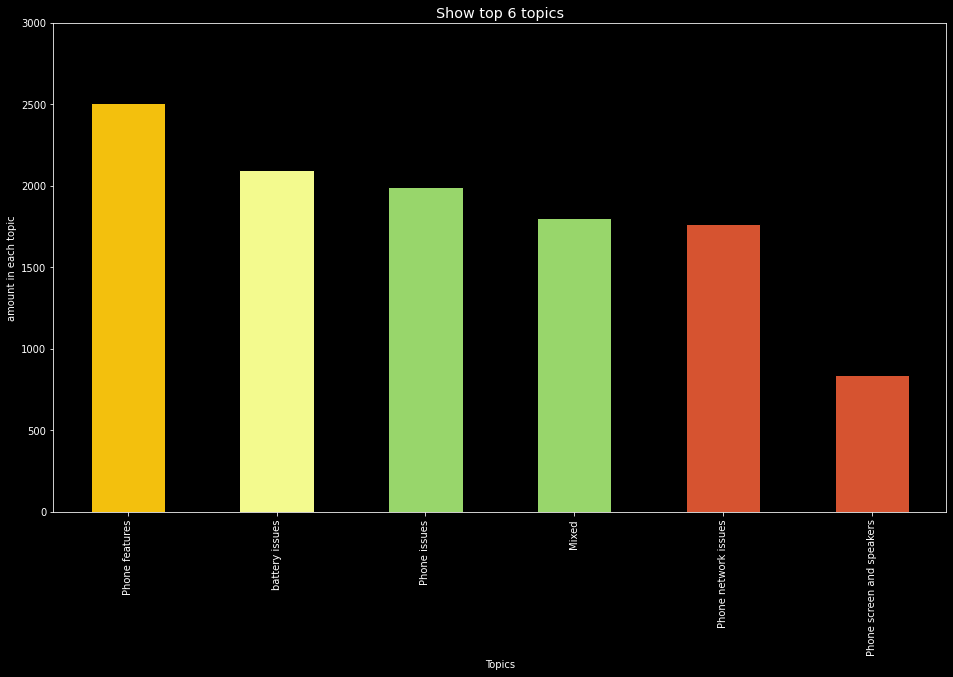

In [481]:
with plt.style.context('dark_background'):
    plt.grid(color='w', linestyle='solid') 
    plt.ticklabel_format(useOffset = False,style='plain')
    plt.style.use('classic')
    final_review['Topic name'].value_counts()[:6].plot(
        kind ='bar',figsize=(16,9), xlabel= 'Topics',
        ylabel= 'amount in each topic', color= colors,title='Show top 6 topics')
    plt.show()